In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib import rc
import warnings
warnings.filterwarnings('ignore')

# 데이터 전처리

In [2]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df["SeniorCitizen"].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [5]:
df["TotalCharges"]

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [6]:
df["SeniorCitizen"] = df["SeniorCitizen"].astype("object")
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"],errors = "coerce")

-SeniorCitizen 변수는 고령자유무에 대한 내용인데 int64로 되어 있음.

-TotalCharges 변수는 수치형변수인데 object로 되어 있음.

SeniorCitizen변수와 TotalCarges변수의 type을 올바르게 변환시켜줌

In [7]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

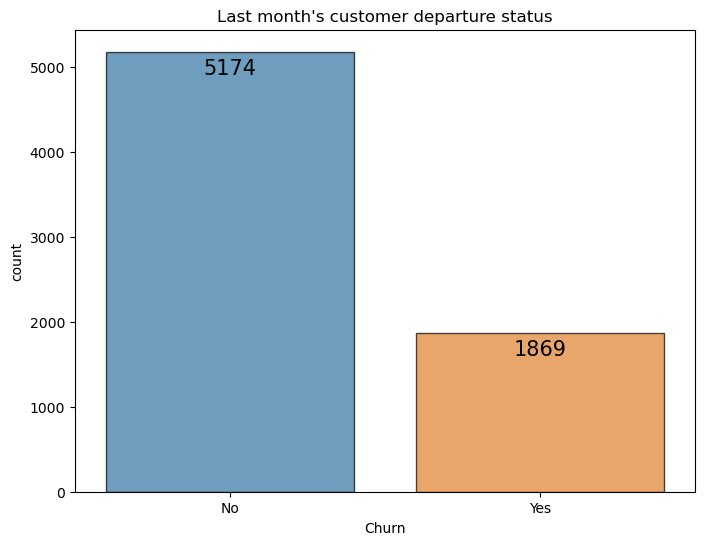

In [8]:
plt.figure(figsize = (8,6))
churn_splot=sns.countplot(df["Churn"], edgecolor="black",alpha=0.7)
plt.title("Last month's customer departure status")

for p in churn_splot.patches:
    churn_splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12),
                   textcoords = 'offset points')

지난달에 비해 고객의 26%가 이탈했음을 알 수 있음.

# 수치형변수 시각화

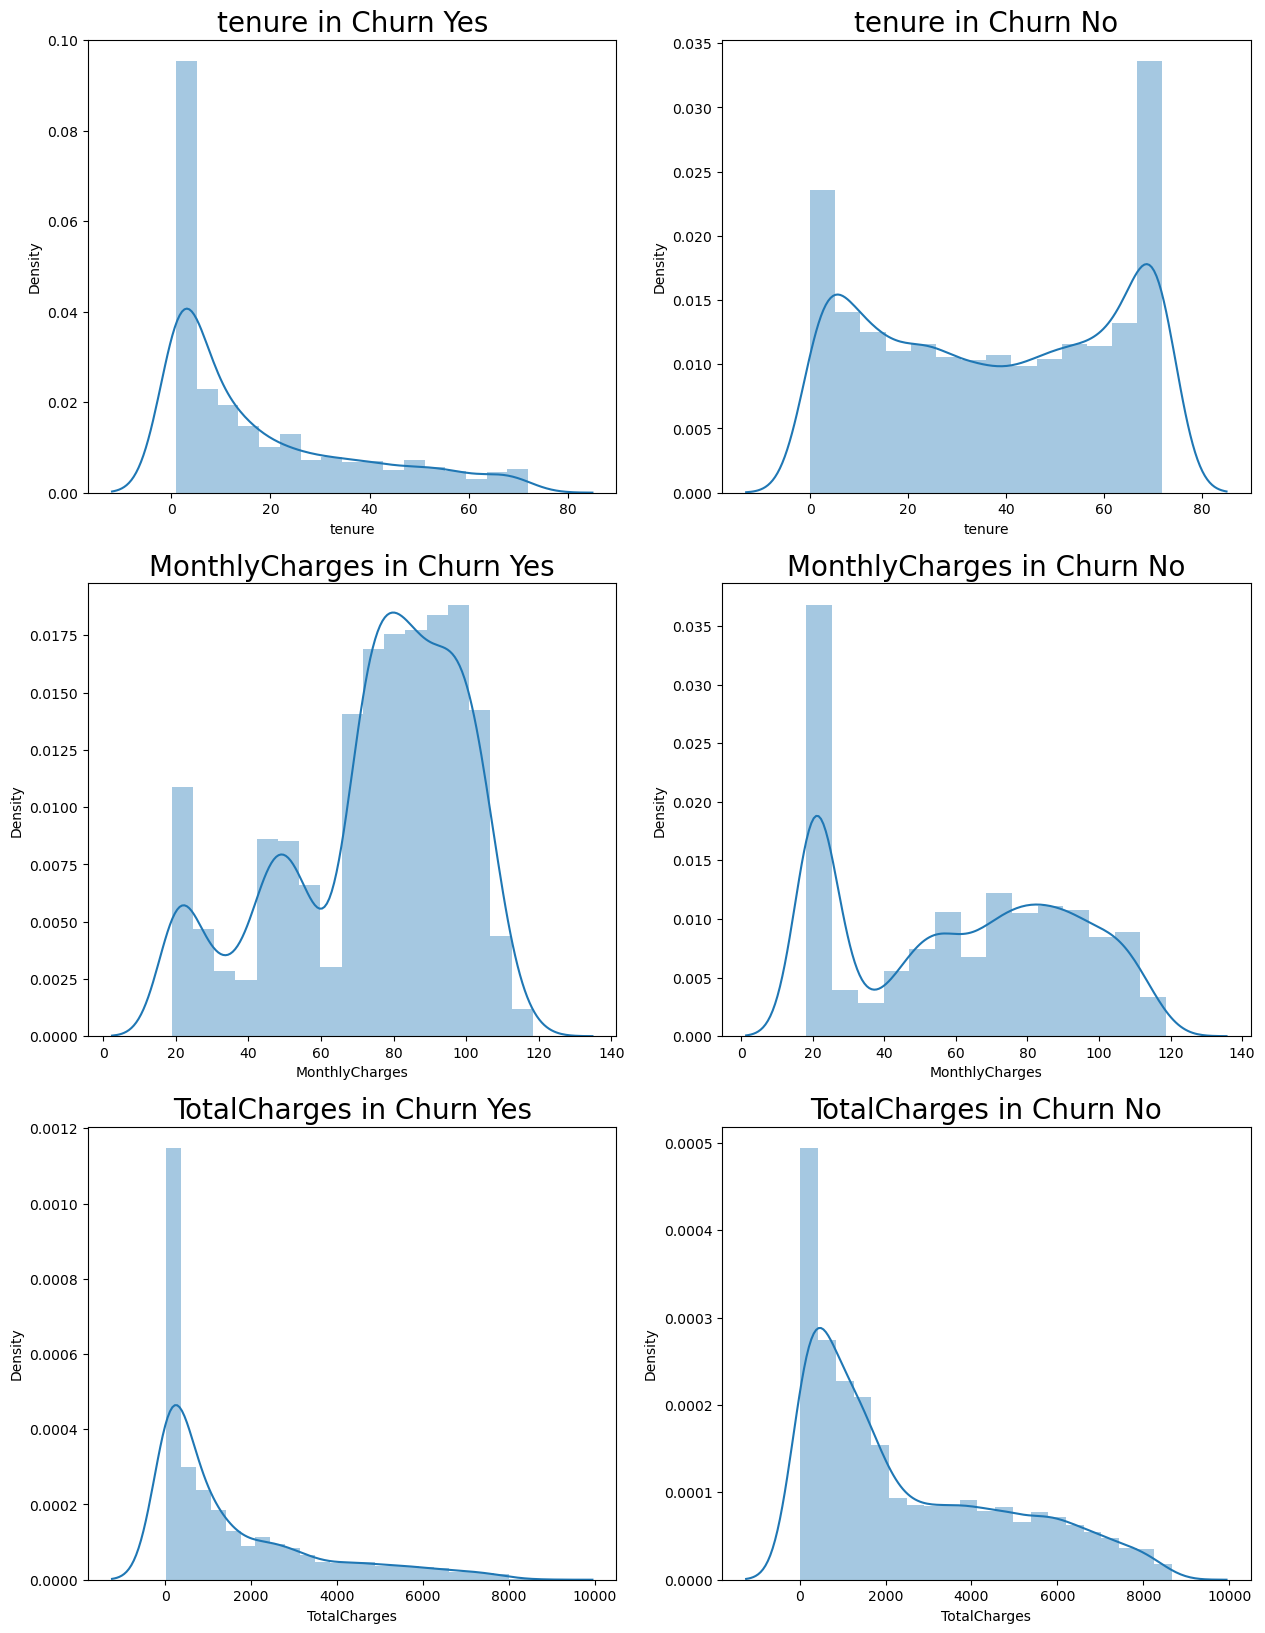

In [9]:
f,ax=plt.subplots(3,2,figsize=(15,20))
num_feature = ["tenure","MonthlyCharges","TotalCharges"]
for i, col in enumerate(num_feature):
    sns.distplot(df[df['Churn']=="Yes"][col],ax=ax[i,0])
    ax[i,0].set_title(col+' in Churn Yes',fontsize = 20)
    sns.distplot(df[df['Churn']=="No"][col],ax=ax[i,1])
    ax[i,1].set_title(col+' in Churn No',fontsize = 20)
plt.show()

<AxesSubplot:title={'center':'수치형변수 상관관계'}>

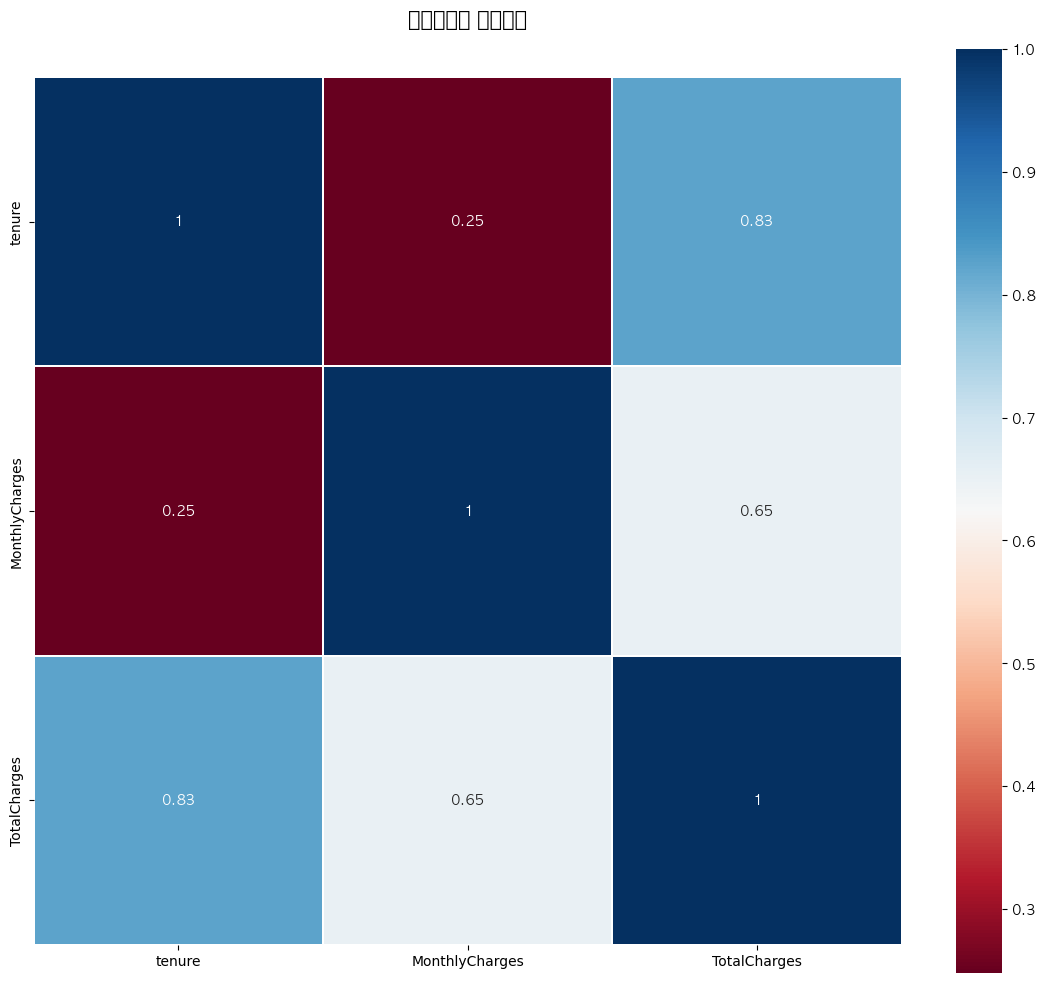

In [10]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('수치형변수 상관관계', y=1.05, size=15)
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
sns.heatmap(df.corr(),linewidths=0.1, vmax=1.0,square=True, cmap=colormap, linecolor='white', annot=True)

월별 높은 금액제를 사용하는 고객의 이탈비율이 더 높음

# 범주형 변수 별 분석

In [11]:
dt=df.drop("customerID", axis = 1)

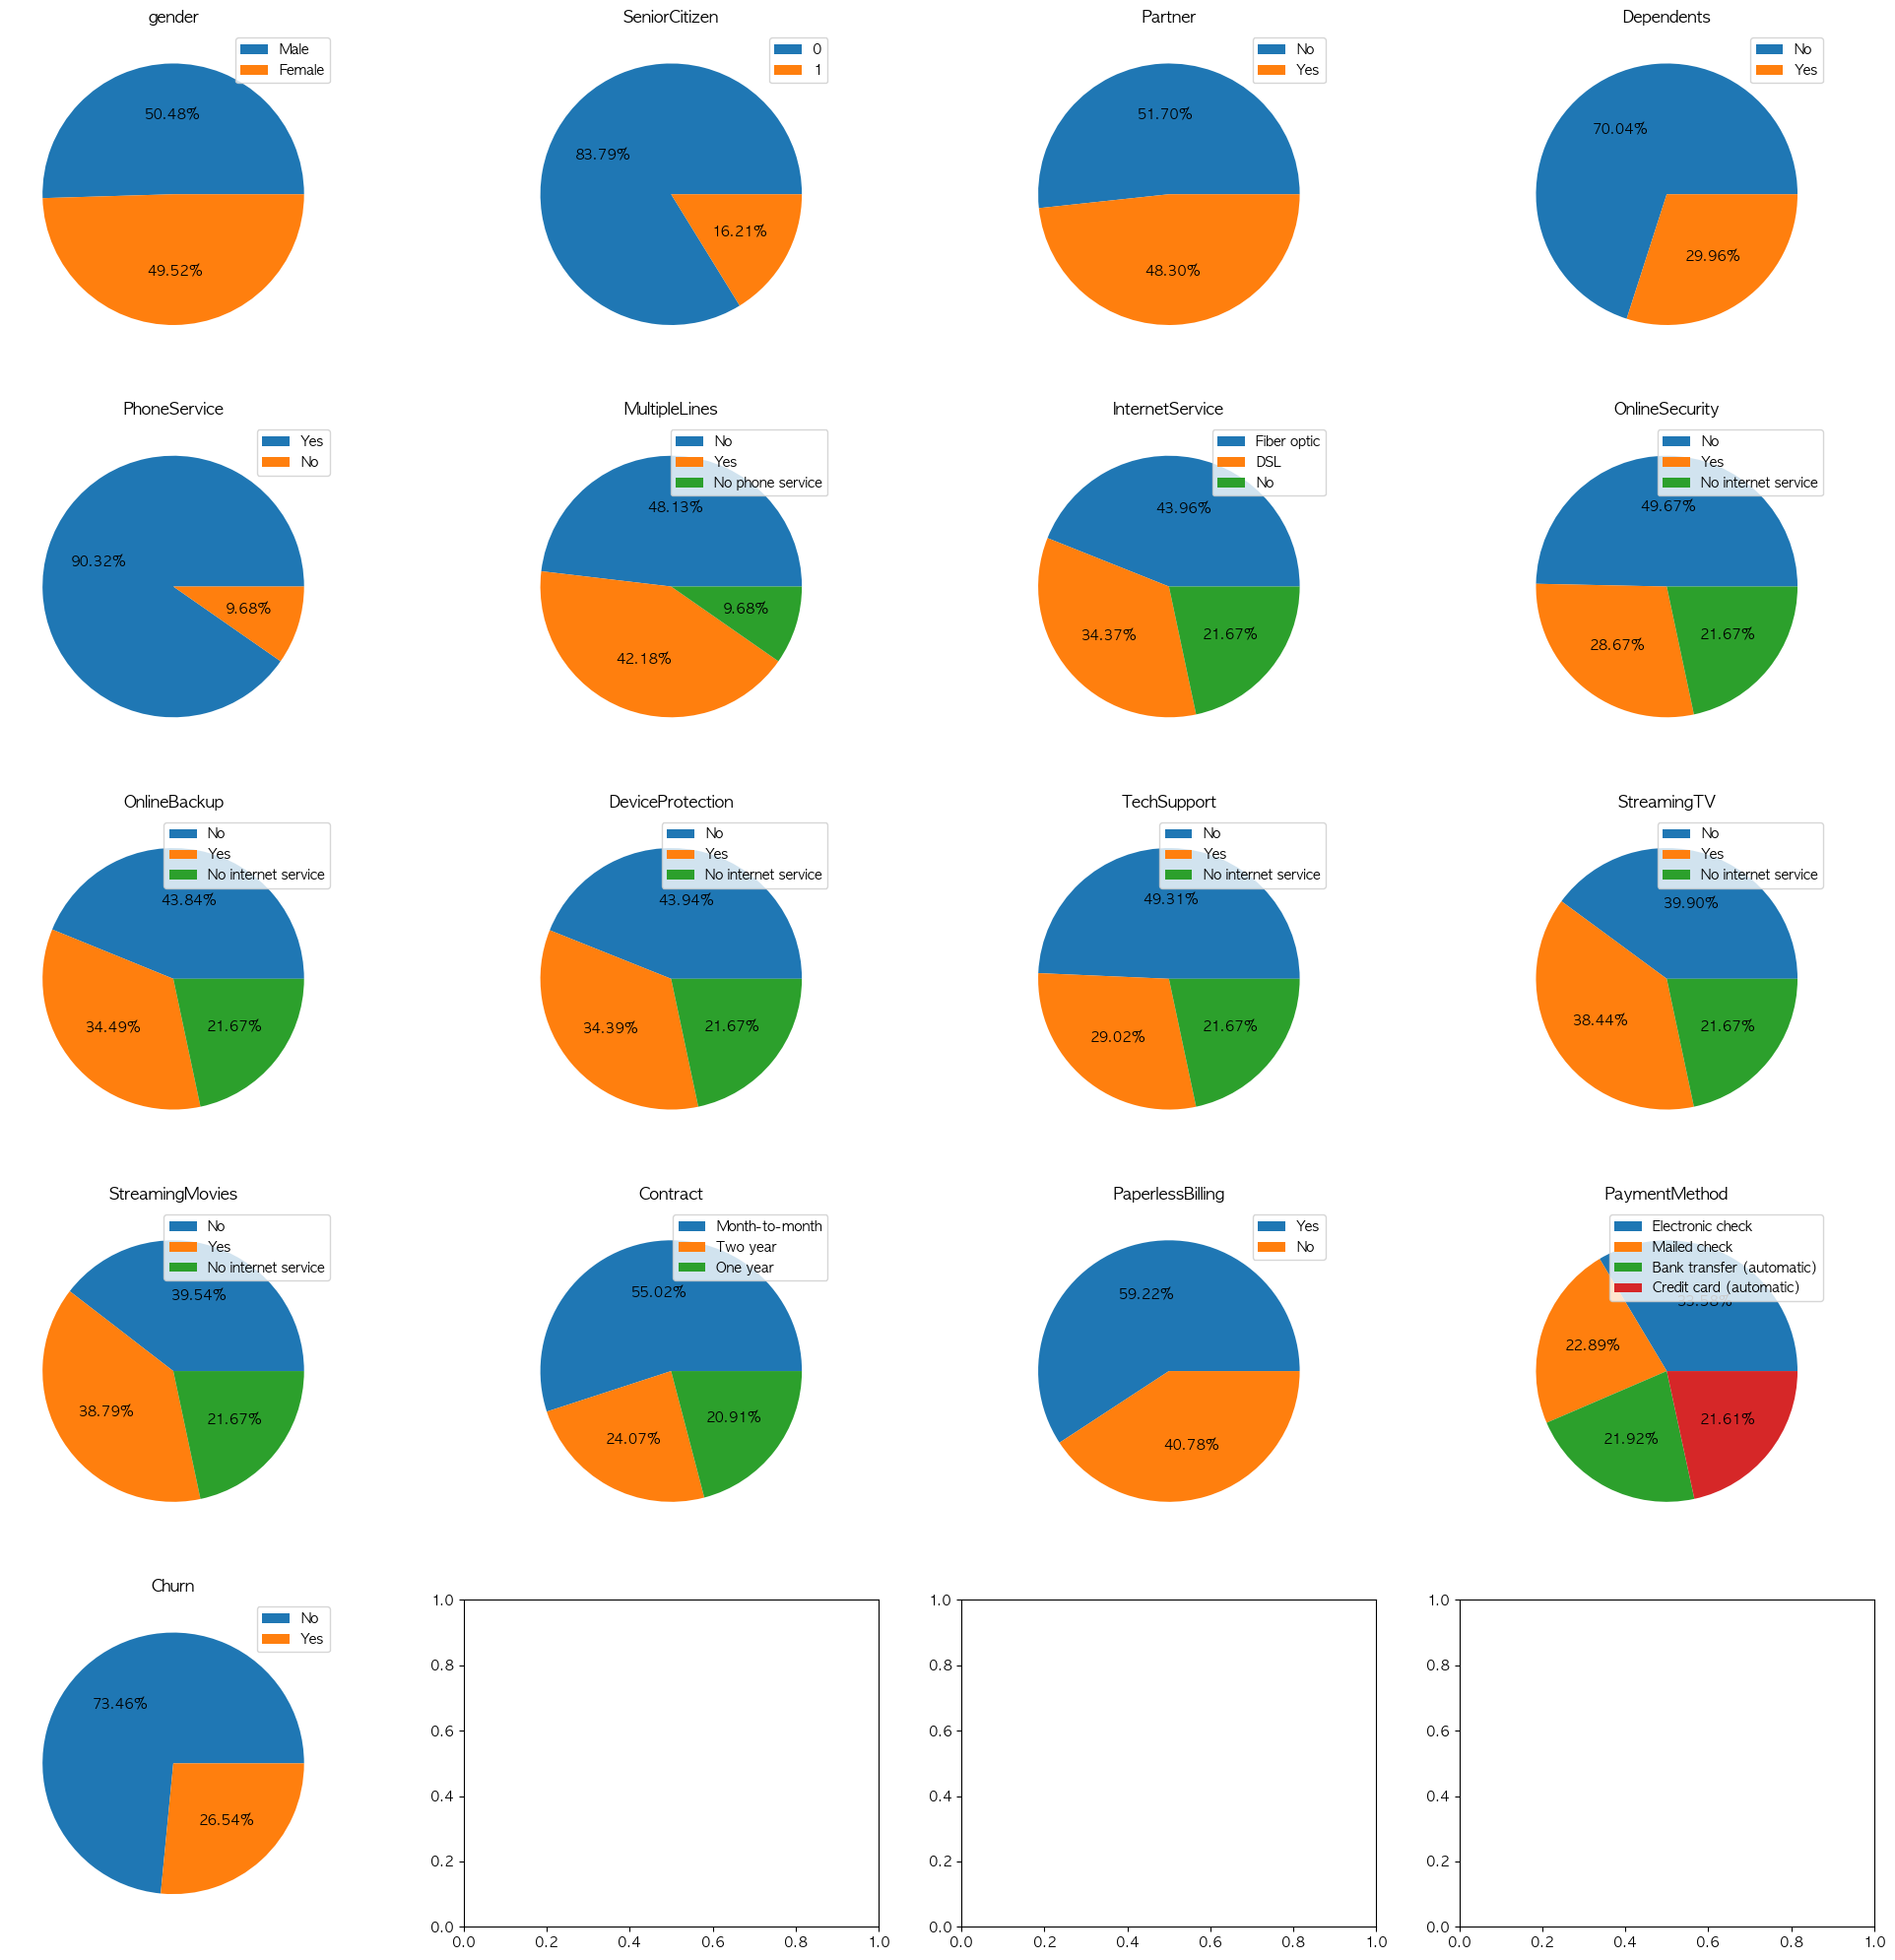

In [12]:
import math

columns = dt.columns.tolist()
dellist = ['tenure','MonthlyCharges','TotalCharges']
for i in dellist:
    columns.remove(i)
    
f, axes = plt.subplots(math.ceil(len(columns)/4),4, figsize=(25,25))
for col, ax in zip(columns, axes.ravel()):
        data = dt[col].value_counts().values.tolist()
        labels = dt[col].value_counts().index.tolist()
        ax.pie(data,autopct='%0.2f%%')
        ax.set_title(col)
        ax.legend(labels,loc='best')

In [13]:
for column in dt.columns:
    if dt[column].dtypes==object:
        print(str(column)+' : '+str(dt[column].unique()))
        print(dt[column].value_counts())
        print('ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ')

gender : ['Female' 'Male']
Male      3555
Female    3488
Name: gender, dtype: int64
ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
SeniorCitizen : [0 1]
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
Partner : ['Yes' 'No']
No     3641
Yes    3402
Name: Partner, dtype: int64
ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
Dependents : ['No' 'Yes']
No     4933
Yes    2110
Name: Dependents, dtype: int64
ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
PhoneService : ['No' 'Yes']
Yes    6361
No      682
Name: PhoneService, dtype: int64
ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
MultipleLines : ['No phone service' 'No' 'Yes']
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
InternetService : ['DSL' 'Fiber optic' 'No']
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
OnlineSecurity : ['No' 'Yes' 'No internet service']
No                     34

In [14]:
category_features=[]
for column in dt.columns:
    if dt[column].dtypes==object:
        category_features.append(column)

In [15]:
print(len(category_features))
category_features.remove('Churn')
print(category_features)
print(len(category_features))

17
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
16


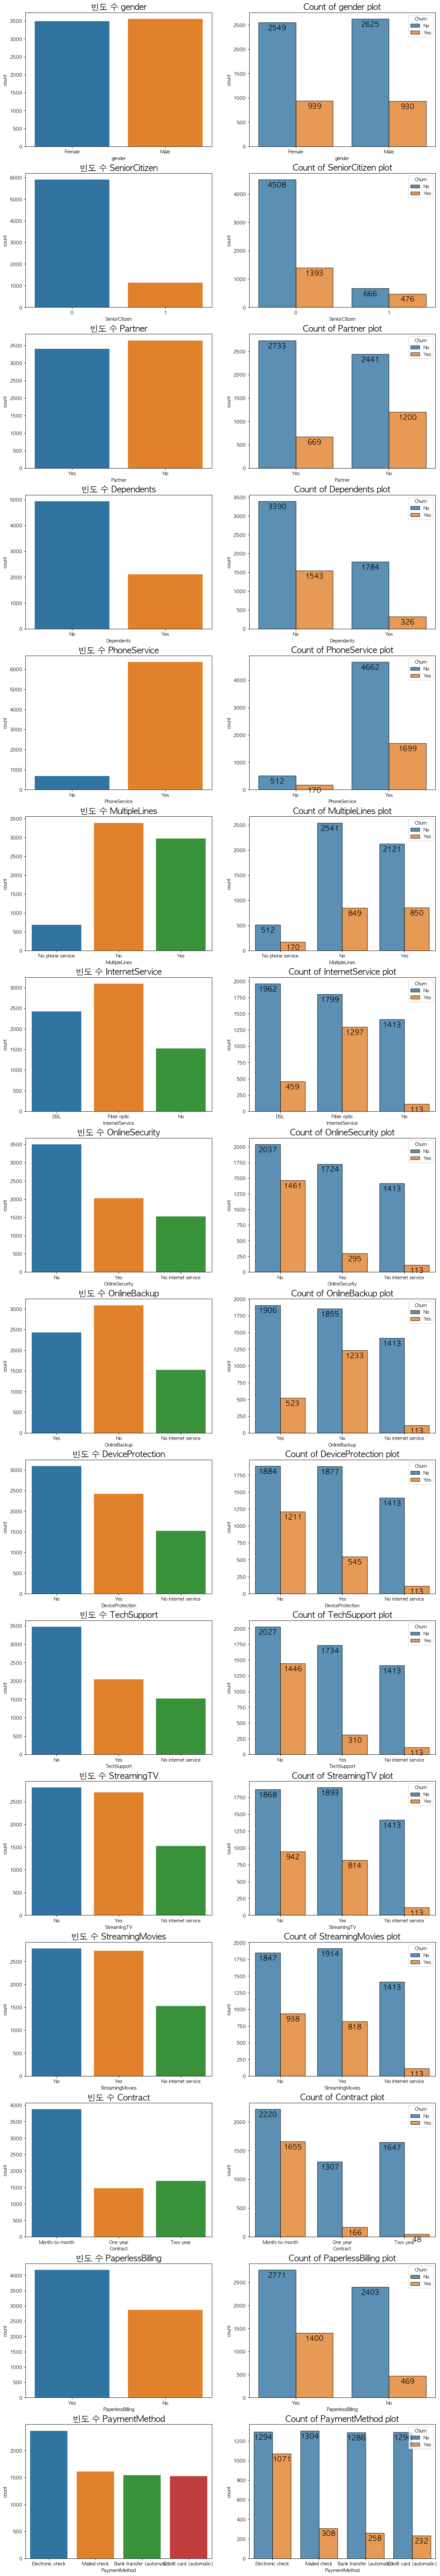

In [16]:

warnings.filterwarnings("ignore")
f, ax = plt.subplots(16,2,figsize=[16,100])

for i, cn in enumerate(df[category_features]):
    sns.countplot(df[cn], ax = ax[i,0])
    ax[i,0].set_title("빈도 수 "+cn, fontsize = 18)
    rc('font', family='AppleGothic')
    plt.rcParams['axes.unicode_minus'] = False
    
    splot = sns.countplot(df[cn],data = df,hue = "Churn", edgecolor="black",alpha=0.8,ax = ax[i, 1])
    ax[i,1].set_title("Count of "+cn+" plot", fontsize = 18)
    
    for p in splot.patches:
        splot.annotate(format(p.get_height(), '.0f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       size=15,
                       xytext = (0, -12), 
                       textcoords = 'offset points')

plt.show()

In [17]:
from scipy.stats import chi2_contingency

p_feature = []

for col_ in category_features:
    chi, p, dof, expected = chi2_contingency(pd.crosstab(df[col_], df.Churn))
    
    if p<=0.05:
        p_feature.append(col_)

        print(col_,
              "Chi2 Statistic: {}".format(round(chi,2)),
              "p-value (0.05): {}".format(round(p,2)),
              "degree of freedom: {}".format(dof),
              "",
              "expected value: \n{}".format(pd.DataFrame(np.round_(expected,2), columns=['No','Yes'])),
              "",
              "original value: \n{}".format(pd.DataFrame(pd.crosstab(df[col_], df.Churn))),

              "-----------------------------------", sep = "\n" )

SeniorCitizen
Chi2 Statistic: 159.43
p-value (0.05): 0.0
degree of freedom: 1

expected value: 
        No      Yes
0  4335.05  1565.95
1   838.95   303.05

original value: 
Churn            No   Yes
SeniorCitizen            
0              4508  1393
1               666   476
-----------------------------------
Partner
Chi2 Statistic: 158.73
p-value (0.05): 0.0
degree of freedom: 1

expected value: 
        No     Yes
0  2674.79  966.21
1  2499.21  902.79

original value: 
Churn      No   Yes
Partner            
No       2441  1200
Yes      2733   669
-----------------------------------
Dependents
Chi2 Statistic: 189.13
p-value (0.05): 0.0
degree of freedom: 1

expected value: 
        No      Yes
0  3623.93  1309.07
1  1550.07   559.93

original value: 
Churn         No   Yes
Dependents            
No          3390  1543
Yes         1784   326
-----------------------------------
MultipleLines
Chi2 Statistic: 11.33
p-value (0.05): 0.0
degree of freedom: 2

expected value: 
        No 

In [18]:
category_features

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [19]:
p_feature

['SeniorCitizen',
 'Partner',
 'Dependents',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [20]:
print("category feature count : ", len(category_features))
print("p-value less 0.05 count : ", len(p_feature))

category feature count :  16
p-value less 0.05 count :  14


이원카이제곱 결과 Churn과 관련없는 변수는 gender, PhoneService 2개임을 확인.

# 인터넷 신청 고객 중 관련 서비스 이용 고객 중 이탈비율

In [21]:
pd.crosstab([df.InternetService, df.OnlineSecurity],df.Churn,margins=True)

Churn                                  No   Yes   All
InternetService OnlineSecurity                       
DSL             No                    894   347  1241
                Yes                  1068   112  1180
Fiber optic     No                   1143  1114  2257
                Yes                   656   183   839
No              No internet service  1413   113  1526
All                                  5174  1869  7043

In [22]:
pd.crosstab([df.InternetService, df.OnlineBackup],df.Churn,margins=True)

Churn                                  No   Yes   All
InternetService OnlineBackup                         
DSL             No                    992   343  1335
                Yes                   970   116  1086
Fiber optic     No                    863   890  1753
                Yes                   936   407  1343
No              No internet service  1413   113  1526
All                                  5174  1869  7043

In [23]:
pd.crosstab([df.InternetService, df.TechSupport],df.Churn,margins=True)

Churn                                  No   Yes   All
InternetService TechSupport                          
DSL             No                    898   345  1243
                Yes                  1064   114  1178
Fiber optic     No                   1129  1101  2230
                Yes                   670   196   866
No              No internet service  1413   113  1526
All                                  5174  1869  7043

In [24]:
pd.crosstab([df.InternetService,df.StreamingTV],df.Churn,margins=True)

Churn                                  No   Yes   All
InternetService StreamingTV                          
DSL             No                   1132   332  1464
                Yes                   830   127   957
Fiber optic     No                    736   610  1346
                Yes                  1063   687  1750
No              No internet service  1413   113  1526
All                                  5174  1869  7043

In [25]:
pd.crosstab([df.InternetService,df.StreamingMovies],df.Churn,margins=True)

Churn                                  No   Yes   All
InternetService StreamingMovies                      
DSL             No                   1118   322  1440
                Yes                   844   137   981
Fiber optic     No                    729   616  1345
                Yes                  1070   681  1751
No              No internet service  1413   113  1526
All                                  5174  1869  7043

# 청구 방식 및 통신비 납부 방식에 따른 이탈률

In [26]:
pd.crosstab([df.Contract,df.PaperlessBilling,df.PaymentMethod], df.Churn, normalize=True)

Churn                                                            No       Yes
Contract       PaperlessBilling PaymentMethod                                
Month-to-month No               Bank transfer (automatic)  0.021440  0.007809
                                Credit card (automatic)    0.016470  0.006389
                                Electronic check           0.037626  0.026693
                                Mailed check               0.049837  0.016754
               Yes              Bank transfer (automatic)  0.033650  0.020730
                                Credit card (automatic)    0.035354  0.018884
                                Electronic check           0.083913  0.114440
                                Mailed check               0.036916  0.023286
One year       No               Bank transfer (automatic)  0.022718  0.001562
                                Credit card (automatic)    0.022860  0.001846
                                Electronic check           0.014198  0.001988
                                Mailed check               0.028965  0.001420
               Yes              Bank transfer (automatic)  0.027403  0.003834
                                Credit card (automatic)    0.027829  0.003976
                                Electronic check           0.025983  0.007099
                                Mailed check               0.015618  0.001846
Two year       No               Bank transfer (automatic)  0.038336  0.000852
                                Credit card (automatic)    0.042453  0.000852
                                Electronic check           0.007667  0.000284
                                Mailed check               0.038620  0.000142
               Yes              Bank transfer (automatic)  0.039046  0.001846
                                Credit card (automatic)    0.038194  0.000994
                                Electronic check           0.014340  0.001562
                                Mailed check               0.015192  0.000284

In [27]:
pd.crosstab(df["Contract"], df.Churn, normalize=True)

Churn,No,Yes
Contract,,
Month-to-month,0.315207,0.234985
One year,0.185574,0.023570
Two year,0.233849,0.006815


In [28]:
pd.crosstab([df.InternetService,df.OnlineSecurity, df.PaperlessBilling],df.Churn,normalize='index', margins=True)*100

Churn                                                        No        Yes
InternetService OnlineSecurity      PaperlessBilling                      
DSL             No                  No                76.458753  23.541247
                                    Yes               69.086022  30.913978
                Yes                 No                91.245791   8.754209
                                    Yes               89.761092  10.238908
Fiber optic     No                  No                59.656652  40.343348
                                    Yes               48.297041  51.702959
                Yes                 No                82.553191  17.446809
                                    Yes               76.490066  23.509934
No              No internet service No                93.425926   6.574074
                                    Yes               90.582960   9.417040
All                                                   73.463013  26.536987

In [29]:
pd.crosstab([df.PaymentMethod,df.Contract],df.Churn,normalize='index', margins=True)*100

Churn                                            No        Yes
PaymentMethod             Contract                            
Bank transfer (automatic) Month-to-month  65.874363  34.125637
                          One year        90.281330   9.718670
                          Two year        96.631206   3.368794
Credit card (automatic)   Month-to-month  67.219153  32.780847
                          One year        89.698492  10.301508
                          Two year        97.762478   2.237522
Electronic check          Month-to-month  46.270270  53.729730
                          One year        81.556196  18.443804
                          Two year        92.261905   7.738095
Mailed check              Month-to-month  68.421053  31.578947
                          One year        93.175074   6.824926
                          Two year        99.214660   0.785340
All                                       73.463013  26.536987

In [30]:
pd.crosstab([df.StreamingMovies],df.Churn,normalize='index',margins=True)*100

Churn,No,Yes
StreamingMovies,,
No,66.319569,33.680431
No internet service,92.595020,7.404980
Yes,70.058565,29.941435
All,73.463013,26.536987


**범주형 특성

-고령자일수록, 청구서를 직접 받을수록, 온라인보안서비스를 신청하지 않았을수록 이탈율이 높음

-Internet Service : 광섬유가 가장 이탈률이 높고 서비스를 신청하지 않은게 가장 이탈율이 낮음 

-Contract : 계약기간이 짧을수록 이탈율이 높음

-PaymentMethod : 직접 계산할수록 이탈율이 높음


**연속형 특성

-tenure : 남은기간이 짧을수록 이탈율 높음 

-MontlyCharges : 이탈율과 선형적 관계없음 

-TotalCharges : 이탈율과 선형적 관계없음